# Seasonal Decompose


## Omajinai

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12, 6)

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-05-10 09:11:37--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.224.141.128, 13.224.141.110, 13.224.141.106, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.224.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121533 (119K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 118.68K  --.-KB/s    in 0.04s   

2022-05-10 09:11:37 (3.26 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [121533/121533]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
df

(844, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-04,26421,2090,246,221,326,173,137,319,498,207,...,103,150,1557,175,361,314,247,372,469,1201
2022-05-05,20713,1854,290,197,210,170,125,339,481,233,...,130,157,1372,244,229,255,230,225,420,1327
2022-05-06,21547,1668,153,181,230,181,115,324,340,262,...,135,140,1181,294,203,290,258,287,521,1398


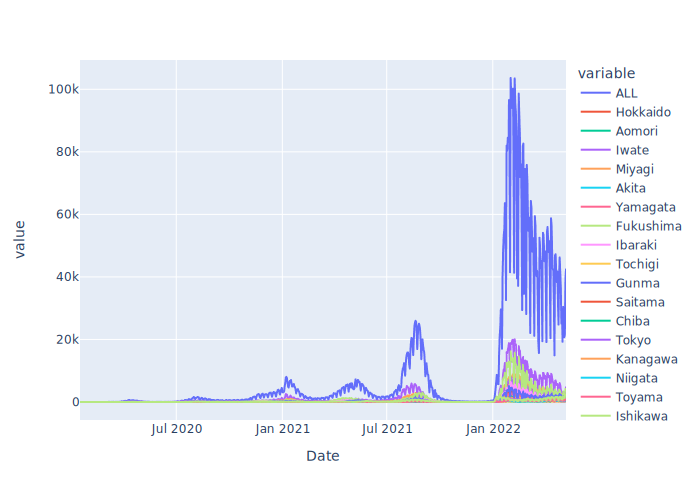

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).sum()
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(1))

(121, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-08,200035,14362,1874,1568,2494,1546,1061,2678,2915,2556,...,1346,1215,11695,1984,2578,2931,2174,2528,4148,10892


### weekly

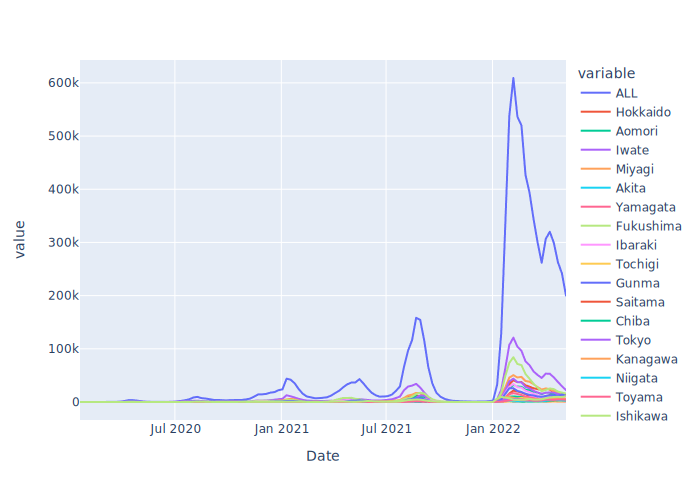

In [7]:
px.line(df_gr,)

## Decompose

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

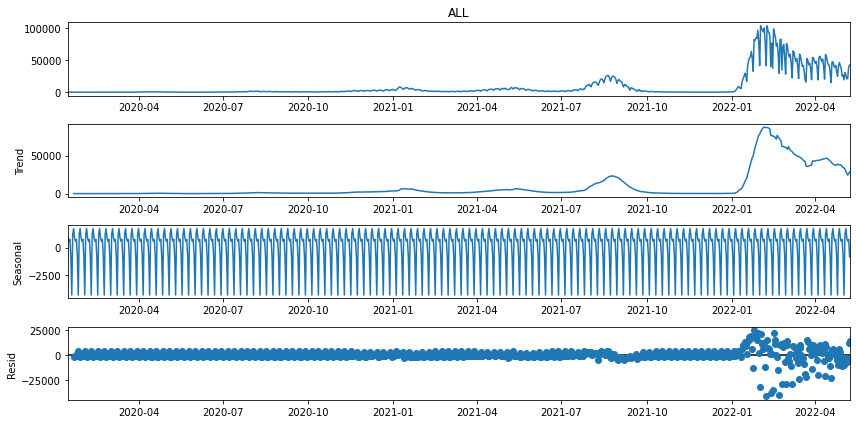

In [9]:
sd = seasonal_decompose(df.ALL, two_sided=False, )#period=7)
fig = sd.plot()

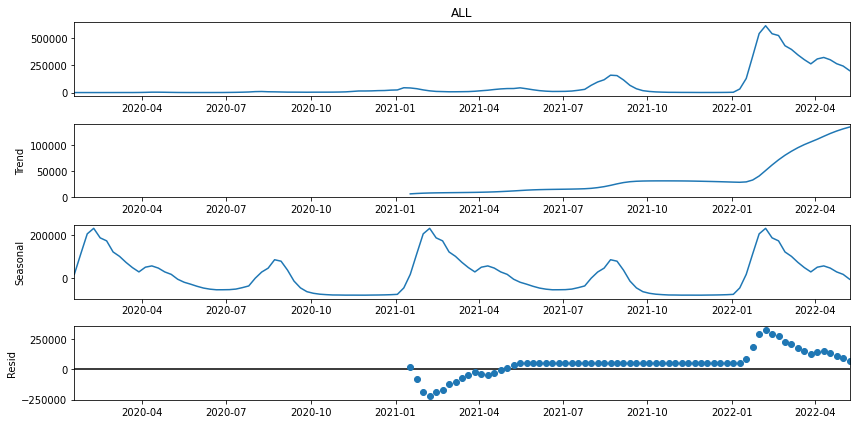

In [10]:
sd = seasonal_decompose(df_gr.ALL, two_sided=False, )#period=12)
fig = sd.plot()